In [3]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 20.7 MB 3.7 MB/s eta 0:00:01    |█████████                       | 5.8 MB 3.4 MB/s eta 0:00:05     |███████████████████████▊        | 15.3 MB 3.7 MB/s eta 0:00:02
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
!{sys.executable} -m pip install numpy

In [19]:
%ls

 f2py*         jupyter-bundlerextension*   jupyter-serverextension*
 f2py3*        jupyter-kernel*             jupyter-troubleshoot*
 f2py3.8*      jupyter-kernelspec*         jupyter-trust*
 iptest*       jupyter-lab*               'purchase order pull.xls'
 iptest3*      jupyter-labextension*       purchase_order_pull.xls
 ipython*      jupyter-migrate*            __pycache__/
 ipython3*     jupyter-nbconvert*          pyjson5*
 jlpm*         jupyter-nbextension*        runxlrd.py*
 jsonschema*   jupyter-notebook*           Untitled.ipynb
 jupyter*      jupyter-run*


In [4]:
!{sys.executable} -m pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.0 MB 8.5 MB/s eta 0:00:01


In [6]:
!{sys.executable} -m pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 103 kB 145 kB/s eta 0:00:01


In [24]:
!{sys.executable} -m pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.5 MB 283 kB/s eta 0:00:01
     |████████████████████████████████| 92 kB 98 kB/s  eta 0:00:01


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def orders():
    df = pd.read_excel(r"purchase_order_pull_clean.xls")
    include = ['Total', 'Deliver To']
    return df[include].groupby(['Deliver To']).sum().sort_values(['Total'], ascending=[False])
orders()

orders = orders()

<AxesSubplot:ylabel='Total'>

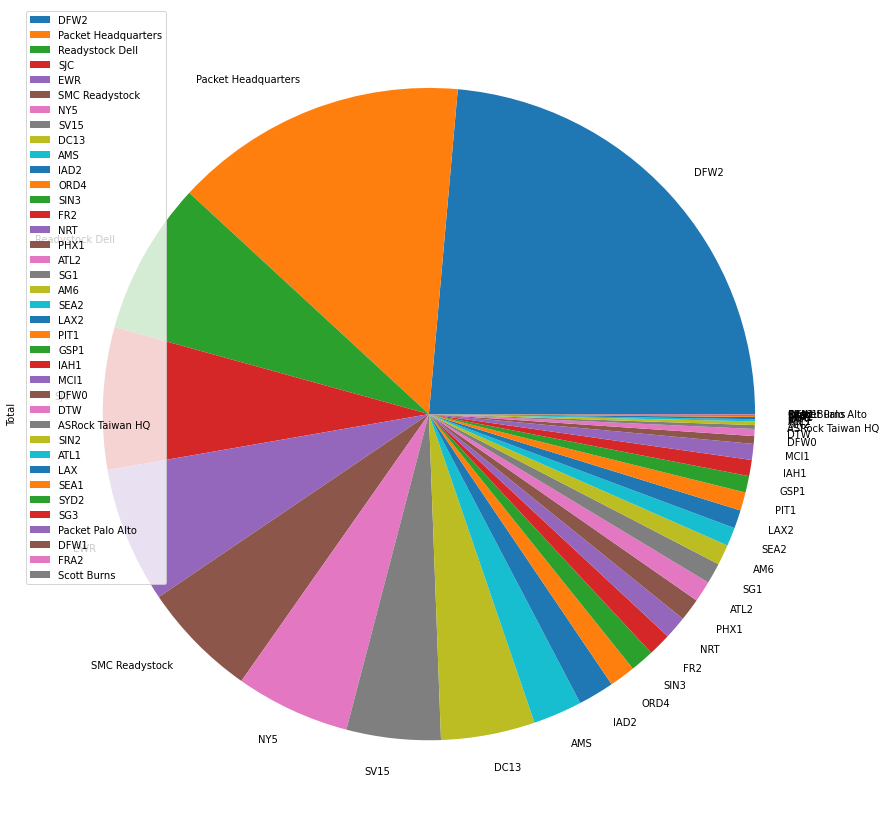

In [86]:
orders.plot.pie(y='Total', figsize=(15, 15))


In [95]:
def dfw2_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df_dfw = df[include2].groupby(['Deliver To']).get_group('DFW2')
    df_dfw['Order Date'] = pd.to_datetime(df_dfw['Order Date'], format='%Y-%m-%d %I-%p')
    df_dfw.set_index('Order Date', inplace=True)
    #return df_dfw #.loc[22, 'Order Date'].day_name()
    df_dfw = df_dfw.resample('M').sum()
    #df_dfw['Monthy % Change'] = df_dfw.pct_change()
    return df_dfw
    #return df_dfw["Total"].plot(linewidth=2)
    #plt.figure(figsize=(10,5))
    #plt.plot(df_dfw)
    #plt.title('DFW2 Purchases')
    #plt.ylabel('Purchases')
    #plt.xlabel('Date')
    #plt.show()

df_dfw = dfw2_year()

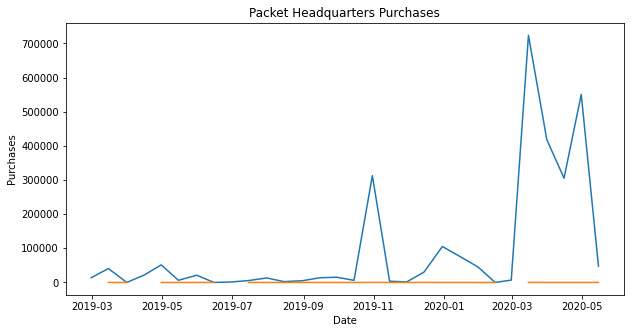

In [57]:
def pckt_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df = df[include2].groupby(['Deliver To']).get_group('Packet Headquarters')
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %I-%p')
    df.set_index('Order Date', inplace=True)
    #return df_dfw #.loc[22, 'Order Date'].day_name()
    df = df.resample('SM').sum()
    df['Monthy % Change'] = df.pct_change()
    plt.figure(figsize=(10,5))
    plt.plot(df)
    plt.title('Packet Headquarters Purchases')
    plt.ylabel('Purchases')
    plt.xlabel('Date')
    plt.show()
    #return df_sjc["Total"].std()

pckt_year()

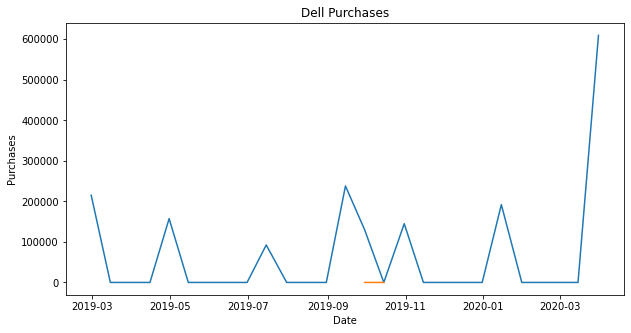

In [63]:
def dell_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df = df[include2].groupby(['Deliver To']).get_group('Readystock Dell')
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %I-%p')
    df.set_index('Order Date', inplace=True)
    #return df_dfw #.loc[22, 'Order Date'].day_name()
    df = df.resample('SM').sum()
    df['Monthy % Change'] = df.pct_change()
    #return df_ewr
    #return df_sjc["Total"].std()
    plt.figure(figsize=(10,5))
    plt.plot(df)
    plt.title('Dell Purchases')
    plt.ylabel('Purchases')
    plt.xlabel('Date')
    plt.show()
dell_year()

In [89]:
def sjc_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df_sjc = df[include2].groupby(['Deliver To']).get_group('SJC')
    df_sjc['Order Date'] = pd.to_datetime(df_sjc['Order Date'], format='%Y-%m-%d %I-%p')
    df_sjc.set_index('Order Date', inplace=True)
    #return df_dfw #.loc[22, 'Order Date'].day_name()
    df_sjc = df_sjc.resample('M').sum()
    #df_sjc['Monthy % Change'] = df_sjc.pct_change()
    return df_sjc
    #return df_sjc["Total"].std()
    #plt.figure(figsize=(10,5))
    #plt.plot(df_sjc)
    #plt.title('SJC1 Purchases')
    #plt.ylabel('Purchases')
    #plt.xlabel('Date')
    #plt.show()
df_sjc = sjc_year()

df_sjc

,Total
Order Date,
2019-01-31,367150.60
2019-02-28,153360.00
2019-03-31,45597.68
2019-04-30,16626.06
2019-05-31,218876.66
2019-06-30,6167.65
2019-07-31,10026.73
2019-08-31,117497.45
2019-09-30,17738.30


In [88]:
def ewr_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df_ewr = df[include2].groupby(['Deliver To']).get_group('EWR')
    df_ewr['Order Date'] = pd.to_datetime(df_ewr['Order Date'], format='%Y-%m-%d %I-%p')
    df_ewr.set_index('Order Date', inplace=True)
    #return df_dfw #.loc[22, 'Order Date'].day_name()
    df_ewr = df_ewr.resample('M').sum()
    #df_ewr['Monthy % Change'] = df_ewr.pct_change()
    return df_ewr
    #return df_ewr["Total"].std()
    #plt.figure(figsize=(10,5))
    #plt.plot(df_ewr)
    #plt.title('EWR1 Purchases')
    #plt.ylabel('Purchases')
    #plt.xlabel('Date')
    #plt.show()

df_ewr = ewr_year()

df_ewr

,Total
Order Date,
2019-01-31,367150.60
2019-02-28,386027.04
2019-03-31,296485.55
2019-04-30,169355.64
2019-05-31,8740.70
2019-06-30,4617.25
2019-07-31,83605.56
2019-08-31,138889.68
2019-09-30,638602.92


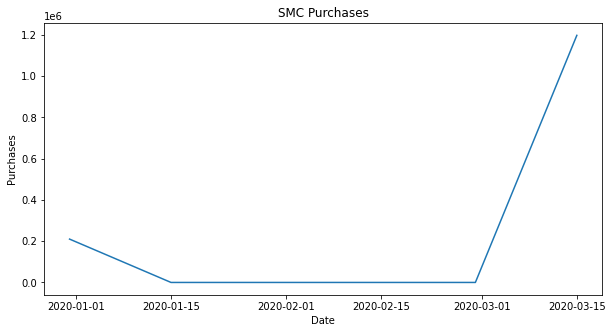

In [97]:
def smc_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df = df[include2].groupby(['Deliver To']).get_group('SMC Readystock')
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %I-%p')
    df.set_index('Order Date', inplace=True)
    #return df_dfw #.loc[22, 'Order Date'].day_name()
    df = df.resample('SM').sum()
    df['Monthy % Change'] = df.pct_change()
    #return df_ewr
    #return df_ewr["Total"].std()
    plt.figure(figsize=(10,5))
    plt.plot(df)
    plt.title('SMC Purchases')
    plt.ylabel('Purchases')
    plt.xlabel('Date')
    plt.show()
smc_year()

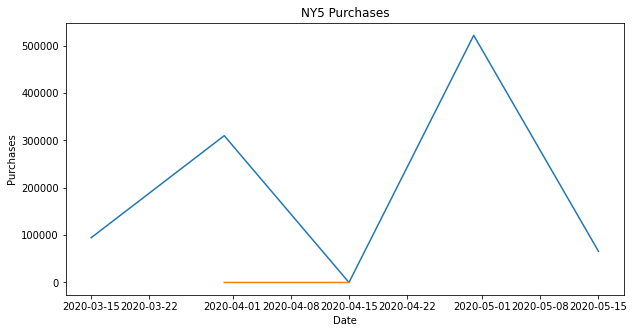

In [67]:
def ny5_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df = df[include2].groupby(['Deliver To']).get_group('NY5')
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %I-%p')
    df.set_index('Order Date', inplace=True)
    #return df_dfw #.loc[22, 'Order Date'].day_name()
    df = df.resample('SM').sum()
    df['Monthy % Change'] = df.pct_change()
    #return df_ewr
    #return df["Total"].std()
    plt.figure(figsize=(10,5))
    plt.plot(df)
    plt.title('NY5 Purchases')
    plt.ylabel('Purchases')
    plt.xlabel('Date')
    plt.show()
ny5_year()

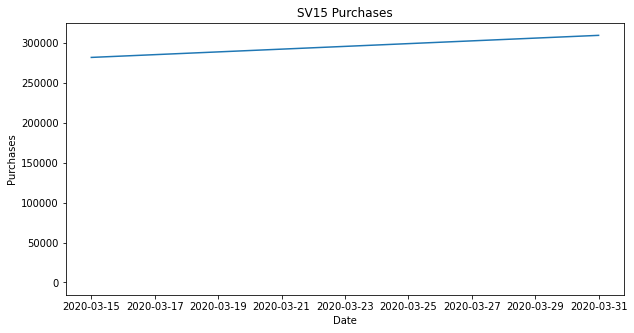

In [69]:
def sv15_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df = df[include2].groupby(['Deliver To']).get_group('SV15')
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %I-%p')
    df.set_index('Order Date', inplace=True)
    #return df_dfw #.loc[22, 'Order Date'].day_name()
    df = df.resample('SM').sum()
    df['Monthy % Change'] = df.pct_change()
    #return df_ewr
    #return df_sjc["Total"].describe()
    plt.figure(figsize=(10,5))
    plt.plot(df)
    plt.title('SV15 Purchases')
    plt.ylabel('Purchases')
    plt.xlabel('Date')
    plt.show()
sv15_year()

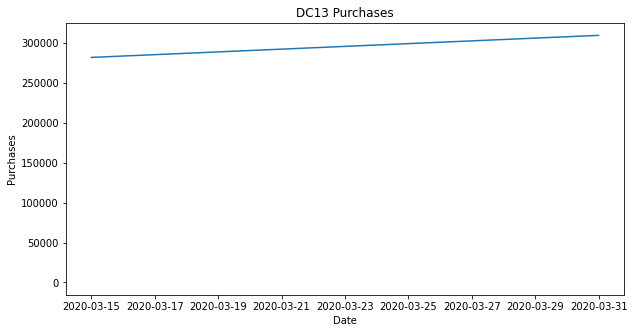

In [72]:
def dc13_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df_dc13 = df[include2].groupby(['Deliver To']).get_group('DC13')
    df_dc13['Order Date'] = pd.to_datetime(df_dc13['Order Date'], format='%Y-%m-%d %I-%p')
    df_dc13.set_index('Order Date', inplace=True)
    #return df_dfw #.loc[22, 'Order Date'].day_name()
    df_dc13 = df_dc13.resample('SM').sum()
    df_dc13['Monthy % Change'] = df_dc13.pct_change()
    #return df_dc13
    #return df_dc13["Total"].describe()
    plt.figure(figsize=(10,5))
    plt.plot(df_dc13)
    plt.title('DC13 Purchases')
    plt.ylabel('Purchases')
    plt.xlabel('Date')
    plt.show()
dc13_year()

In [87]:
def ams_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df = df[include2].groupby(['Deliver To']).get_group('AMS')
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %I-%p')
    df.set_index('Order Date', inplace=True)
    #return df_dfw #.loc[22, 'Order Date'].day_name()
    df = df.resample('M').sum()
    #df['Monthy % Change'] = df.pct_change()
    return df
    #return df_sjc["Total"].std()
    
    #plt.figure(figsize=(10,5))
    #plt.plot(df)
    #plt.title('AMS1 Purchases')
    #plt.ylabel('Purchases')
    #plt.xlabel('Date')
    #plt.show()


df_ams = ams_year()

df_ams

,Total
Order Date,
2019-01-31,82040.00
2019-02-28,0.00
2019-03-31,43780.50
2019-04-30,0.00
2019-05-31,104090.72
2019-06-30,61752.97
2019-07-31,0.00
2019-08-31,0.00
2019-09-30,5200.00


In [99]:
def iad2_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df = df[include2].groupby(['Deliver To']).get_group('IAD2')
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %I-%p')
    df.set_index('Order Date', inplace=True)
    #return df_dfw #.loc[22, 'Order Date'].day_name()
    df = df.resample('M').sum()
    df['Monthy % Change'] = df.pct_change()
    return df
    #return df_dc13["Total"].describe()
    #plt.figure(figsize=(10,5))
    #plt.plot(df)
    #plt.title('IAD2 Purchases')
    #plt.ylabel('Purchases')
    #plt.xlabel('Date')
    #plt.show()
df_iad2 = iad2_year()

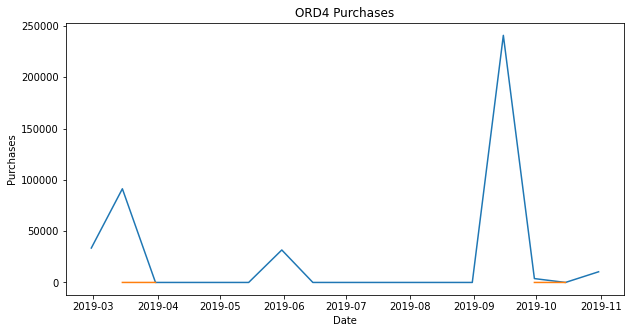

In [78]:
def ord4_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df = df[include2].groupby(['Deliver To']).get_group('ORD4')
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %I-%p')
    df.set_index('Order Date', inplace=True)
    #return df_dfw #.loc[22, 'Order Date'].day_name()
    df = df.resample('SM').sum()
    df['Monthy % Change'] = df.pct_change()
    #return df
    #return df_dc13["Total"].describe()
    plt.figure(figsize=(10,5))
    plt.plot(df)
    plt.title('ORD4 Purchases')
    plt.ylabel('Purchases')
    plt.xlabel('Date')
    plt.show()
ord4_year()

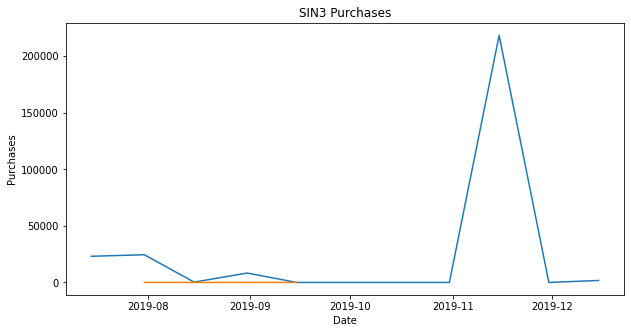

In [82]:
def sin3_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df = df[include2].groupby(['Deliver To']).get_group('SIN3')
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %I-%p')
    df.set_index('Order Date', inplace=True)
    #return df_dfw #.loc[22, 'Order Date'].day_name()
    df = df.resample('SM').sum()
    df['Monthy % Change'] = df.pct_change()
    #return df
    #return df_dc13["Total"].describe()
    plt.figure(figsize=(10,5))
    plt.plot(df)
    plt.title('SIN3 Purchases')
    plt.ylabel('Purchases')
    plt.xlabel('Date')
    plt.show()
sin3_year()

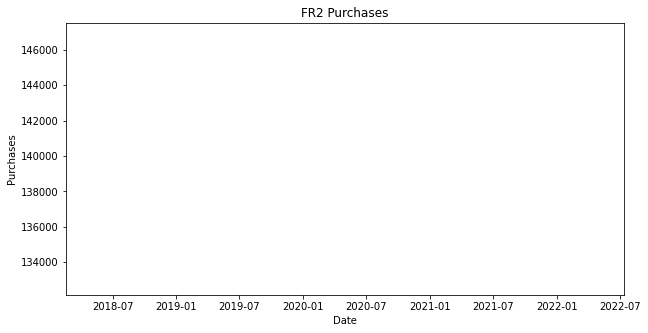

In [84]:
def FR2_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df = df[include2].groupby(['Deliver To']).get_group('FR2')
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %I-%p')
    df.set_index('Order Date', inplace=True)
    df = df.resample('SM').sum()
    df['Monthy % Change'] = df.pct_change()
    plt.figure(figsize=(10,5))
    plt.plot(df)
    plt.title('FR2 Purchases')
    plt.ylabel('Purchases')
    plt.xlabel('Date')
    plt.show()
FR2_year()

In [90]:
def NRT_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df = df[include2].groupby(['Deliver To']).get_group('NRT')
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %I-%p')
    df.set_index('Order Date', inplace=True)
    df = df.resample('M').sum()
    #df['Monthy % Change'] = df.pct_change()
    return df
    #plt.figure(figsize=(10,5))
    #plt.plot(df)
    #plt.title('NRT Purchases')
    #plt.ylabel('Purchases')
    #plt.xlabel('Date')
    #plt.show()
df_nrt = NRT_year()


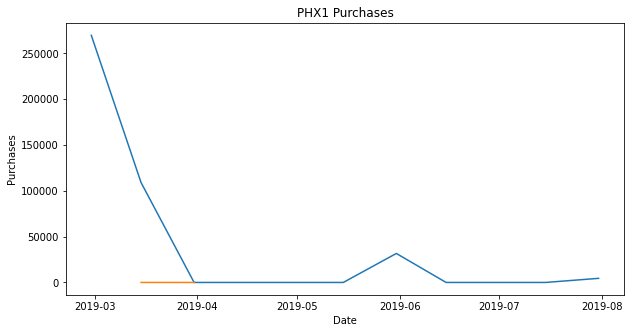

In [86]:
def PHX1_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df = df[include2].groupby(['Deliver To']).get_group('PHX1')
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %I-%p')
    df.set_index('Order Date', inplace=True)
    df = df.resample('SM').sum()
    df['Monthy % Change'] = df.pct_change()
    plt.figure(figsize=(10,5))
    plt.plot(df)
    plt.title('PHX1 Purchases')
    plt.ylabel('Purchases')
    plt.xlabel('Date')
    plt.show()
PHX1_year()

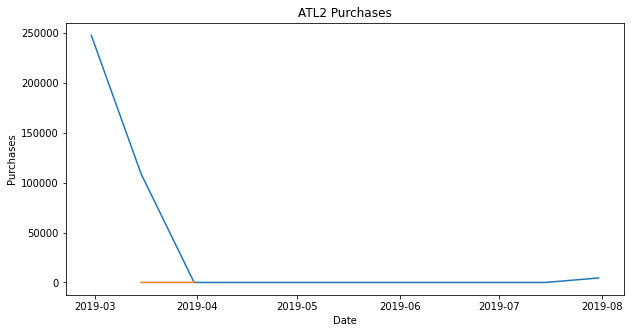

In [87]:
def ATL2_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df = df[include2].groupby(['Deliver To']).get_group('ATL2')
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %I-%p')
    df.set_index('Order Date', inplace=True)
    df = df.resample('SM').sum()
    df['Monthy % Change'] = df.pct_change()
    plt.figure(figsize=(10,5))
    plt.plot(df)
    plt.title('ATL2 Purchases')
    plt.ylabel('Purchases')
    plt.xlabel('Date')
    plt.show()
ATL2_year()

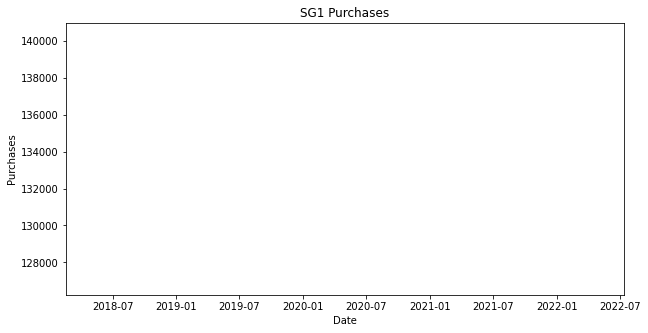

In [88]:
def SG1_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df = df[include2].groupby(['Deliver To']).get_group('SG1')
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %I-%p')
    df.set_index('Order Date', inplace=True)
    df = df.resample('SM').sum()
    df['Monthy % Change'] = df.pct_change()
    plt.figure(figsize=(10,5))
    plt.plot(df)
    plt.title('SG1 Purchases')
    plt.ylabel('Purchases')
    plt.xlabel('Date')
    plt.show()
SG1_year()

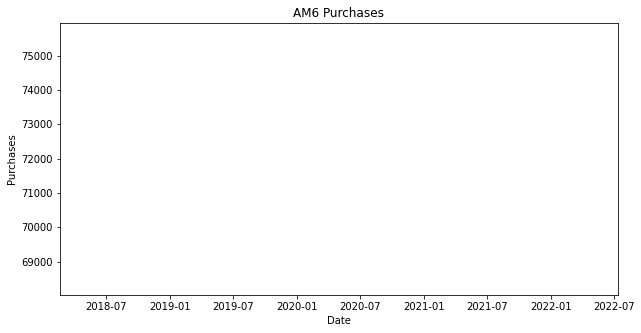

In [89]:
def AM6_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df = df[include2].groupby(['Deliver To']).get_group('AM6')
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %I-%p')
    df.set_index('Order Date', inplace=True)
    df = df.resample('SM').sum()
    df['Monthy % Change'] = df.pct_change()
    plt.figure(figsize=(10,5))
    plt.plot(df)
    plt.title('AM6 Purchases')
    plt.ylabel('Purchases')
    plt.xlabel('Date')
    plt.show()
AM6_year()

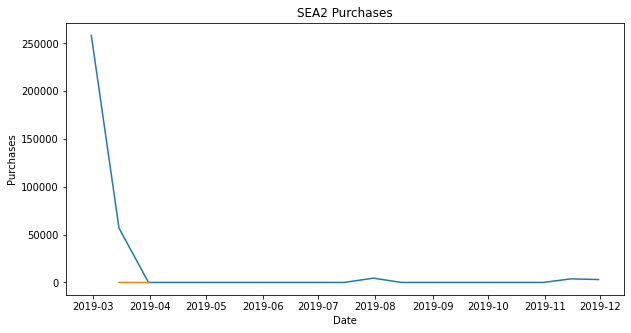

In [90]:
def SEA2_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df = df[include2].groupby(['Deliver To']).get_group('SEA2')
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %I-%p')
    df.set_index('Order Date', inplace=True)
    df = df.resample('SM').sum()
    df['Monthy % Change'] = df.pct_change()
    plt.figure(figsize=(10,5))
    plt.plot(df)
    plt.title('SEA2 Purchases')
    plt.ylabel('Purchases')
    plt.xlabel('Date')
    plt.show()
SEA2_year()

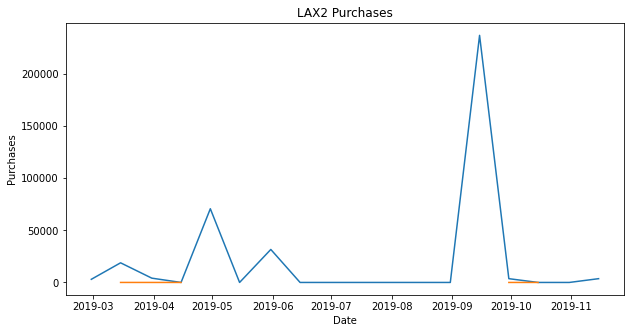

In [91]:
def LAX2_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df = df[include2].groupby(['Deliver To']).get_group('LAX2')
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %I-%p')
    df.set_index('Order Date', inplace=True)
    df = df.resample('SM').sum()
    df['Monthy % Change'] = df.pct_change()
    plt.figure(figsize=(10,5))
    plt.plot(df)
    plt.title('LAX2 Purchases')
    plt.ylabel('Purchases')
    plt.xlabel('Date')
    plt.show()
LAX2_year()

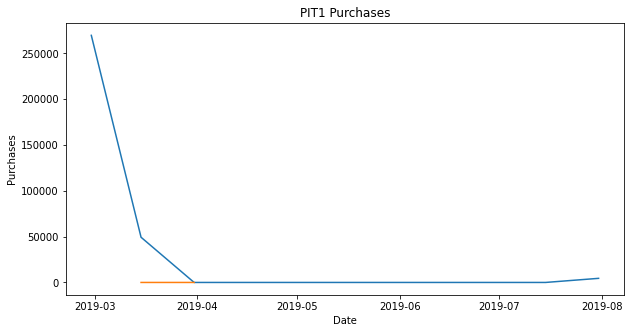

In [92]:
def PIT1_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df = df[include2].groupby(['Deliver To']).get_group('PIT1')
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %I-%p')
    df.set_index('Order Date', inplace=True)
    df = df.resample('SM').sum()
    df['Monthy % Change'] = df.pct_change()
    plt.figure(figsize=(10,5))
    plt.plot(df)
    plt.title('PIT1 Purchases')
    plt.ylabel('Purchases')
    plt.xlabel('Date')
    plt.show()
PIT1_year()

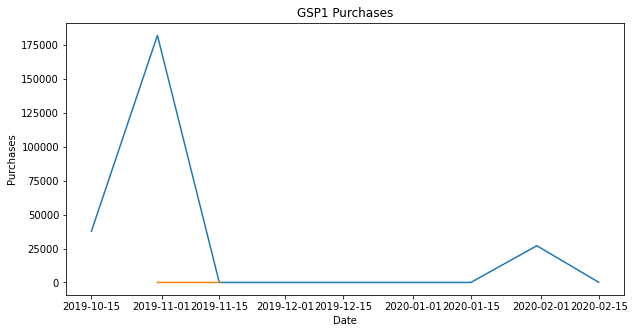

In [93]:
def GSP1_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df = df[include2].groupby(['Deliver To']).get_group('GSP1')
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %I-%p')
    df.set_index('Order Date', inplace=True)
    df = df.resample('SM').sum()
    df['Monthy % Change'] = df.pct_change()
    plt.figure(figsize=(10,5))
    plt.plot(df)
    plt.title('GSP1 Purchases')
    plt.ylabel('Purchases')
    plt.xlabel('Date')
    plt.show()
GSP1_year()

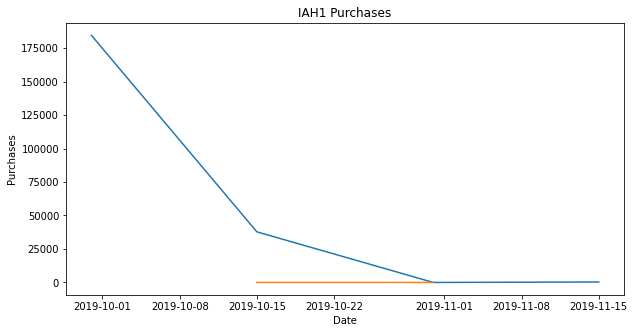

In [99]:
def IAH1_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df = df[include2].groupby(['Deliver To']).get_group('IAH1')
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %I-%p')
    df.set_index('Order Date', inplace=True)
    df = df.resample('SM').sum()
    df['Monthy % Change'] = df.pct_change()
    plt.figure(figsize=(10,5))
    plt.plot(df)
    plt.title('IAH1 Purchases')
    plt.ylabel('Purchases')
    plt.xlabel('Date')
    plt.show()
IAH1_year()

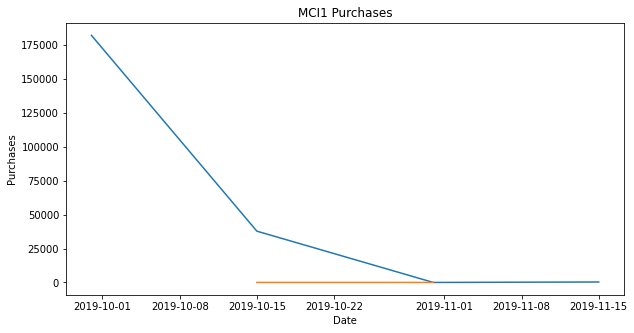

In [100]:
def MCI1_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df = df[include2].groupby(['Deliver To']).get_group('MCI1')
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %I-%p')
    df.set_index('Order Date', inplace=True)
    df = df.resample('SM').sum()
    df['Monthy % Change'] = df.pct_change()
    plt.figure(figsize=(10,5))
    plt.plot(df)
    plt.title('MCI1 Purchases')
    plt.ylabel('Purchases')
    plt.xlabel('Date')
    plt.show()
MCI1_year()

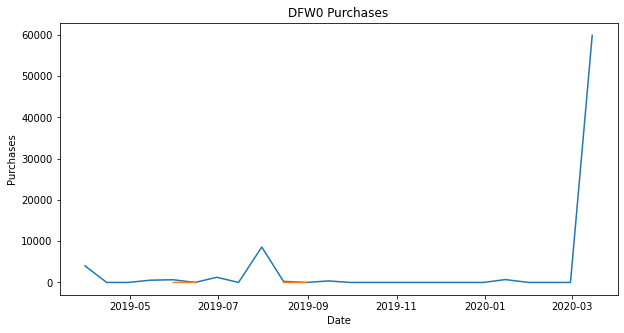

In [101]:
def DFW0_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df = df[include2].groupby(['Deliver To']).get_group('DFW0')
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %I-%p')
    df.set_index('Order Date', inplace=True)
    df = df.resample('SM').sum()
    df['Monthy % Change'] = df.pct_change()
    plt.figure(figsize=(10,5))
    plt.plot(df)
    plt.title('DFW0 Purchases')
    plt.ylabel('Purchases')
    plt.xlabel('Date')
    plt.show()
DFW0_year()

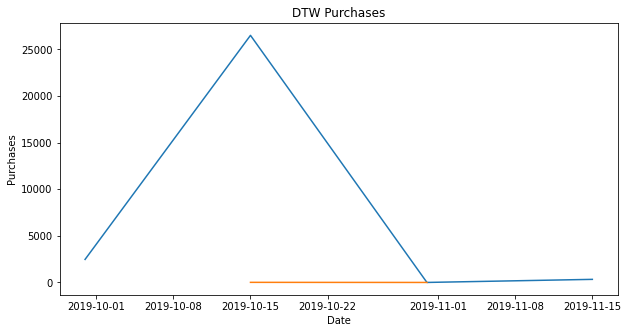

In [7]:
def DTW_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df = df[include2].groupby(['Deliver To']).get_group('DTW')
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %I-%p')
    df.set_index('Order Date', inplace=True)
    df = df.resample('SM').sum()
    df['Monthy % Change'] = df.pct_change()
    plt.figure(figsize=(10,5))
    plt.plot(df)
    plt.title('DTW Purchases')
    plt.ylabel('Purchases')
    plt.xlabel('Date')
    plt.show()
DTW_year()

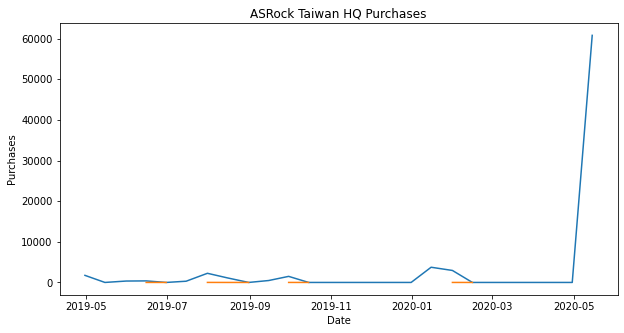

In [8]:
def asrock_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df = df[include2].groupby(['Deliver To']).get_group('ASRock Taiwan HQ')
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %I-%p')
    df.set_index('Order Date', inplace=True)
    df = df.resample('SM').sum()
    df['Monthy % Change'] = df.pct_change()
    plt.figure(figsize=(10,5))
    plt.plot(df)
    plt.title('ASRock Taiwan HQ Purchases')
    plt.ylabel('Purchases')
    plt.xlabel('Date')
    plt.show()
asrock_year()

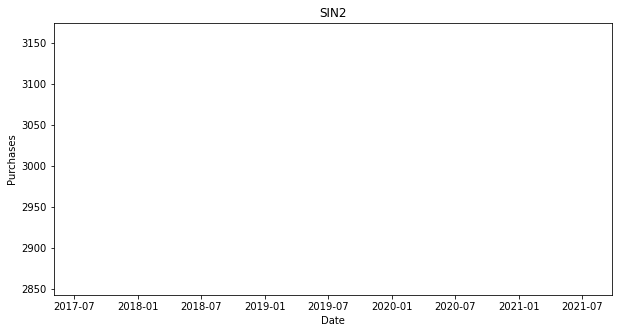

In [9]:
def SIN2_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df = df[include2].groupby(['Deliver To']).get_group('SIN2')
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %I-%p')
    df.set_index('Order Date', inplace=True)
    df = df.resample('SM').sum()
    df['Monthy % Change'] = df.pct_change()
    plt.figure(figsize=(10,5))
    plt.plot(df)
    plt.title('SIN2')
    plt.ylabel('Purchases')
    plt.xlabel('Date')
    plt.show()
SIN2_year()

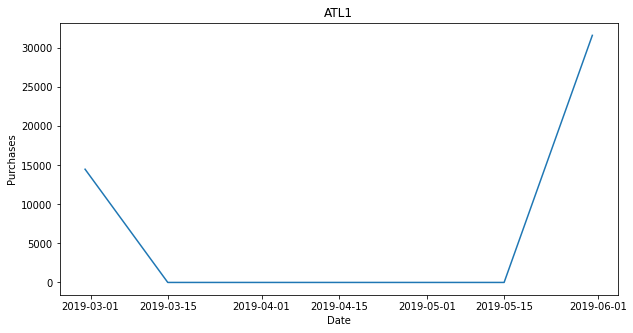

In [10]:
def ATL1_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df = df[include2].groupby(['Deliver To']).get_group('ATL1')
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %I-%p')
    df.set_index('Order Date', inplace=True)
    df = df.resample('SM').sum()
    df['Monthy % Change'] = df.pct_change()
    plt.figure(figsize=(10,5))
    plt.plot(df)
    plt.title('ATL1')
    plt.ylabel('Purchases')
    plt.xlabel('Date')
    plt.show()
ATL1_year()

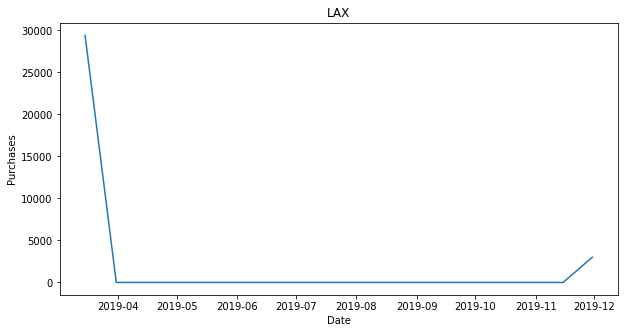

In [11]:
def LAX_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df = df[include2].groupby(['Deliver To']).get_group('LAX')
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %I-%p')
    df.set_index('Order Date', inplace=True)
    df = df.resample('SM').sum()
    df['Monthy % Change'] = df.pct_change()
    plt.figure(figsize=(10,5))
    plt.plot(df)
    plt.title('LAX')
    plt.ylabel('Purchases')
    plt.xlabel('Date')
    plt.show()
LAX_year()

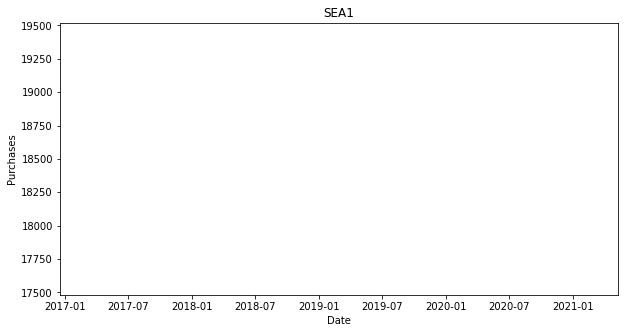

In [12]:
def SEA1_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df = df[include2].groupby(['Deliver To']).get_group('SEA1')
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %I-%p')
    df.set_index('Order Date', inplace=True)
    df = df.resample('SM').sum()
    df['Monthy % Change'] = df.pct_change()
    plt.figure(figsize=(10,5))
    plt.plot(df)
    plt.title('SEA1')
    plt.ylabel('Purchases')
    plt.xlabel('Date')
    plt.show()
SEA1_year()

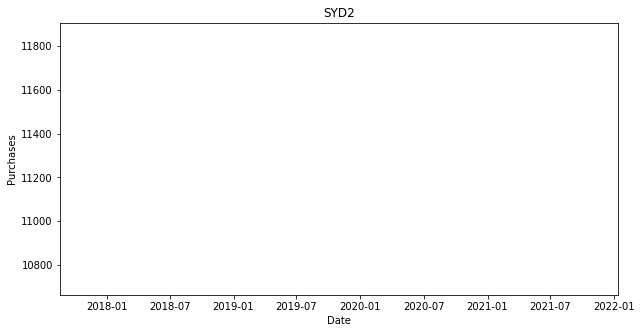

In [13]:
def SYD2_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df = df[include2].groupby(['Deliver To']).get_group('SYD2')
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %I-%p')
    df.set_index('Order Date', inplace=True)
    df = df.resample('SM').sum()
    df['Monthy % Change'] = df.pct_change()
    plt.figure(figsize=(10,5))
    plt.plot(df)
    plt.title('SYD2')
    plt.ylabel('Purchases')
    plt.xlabel('Date')
    plt.show()
SYD2_year()

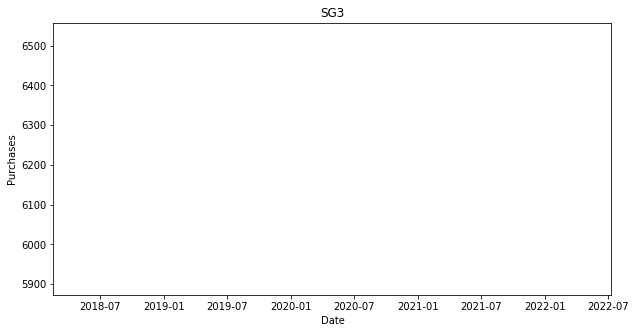

In [14]:
def SG3_year():
    df = pd.read_excel(r"purchase_order_pull_clean_dates.xls")
    include2 = ['Order Date', 'Total', 'Deliver To']
    df = df[include2].groupby(['Deliver To']).get_group('SG3')
    df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %I-%p')
    df.set_index('Order Date', inplace=True)
    df = df.resample('SM').sum()
    df['Monthy % Change'] = df.pct_change()
    plt.figure(figsize=(10,5))
    plt.plot(df)
    plt.title('SG3')
    plt.ylabel('Purchases')
    plt.xlabel('Date')
    plt.show()
SG3_year()

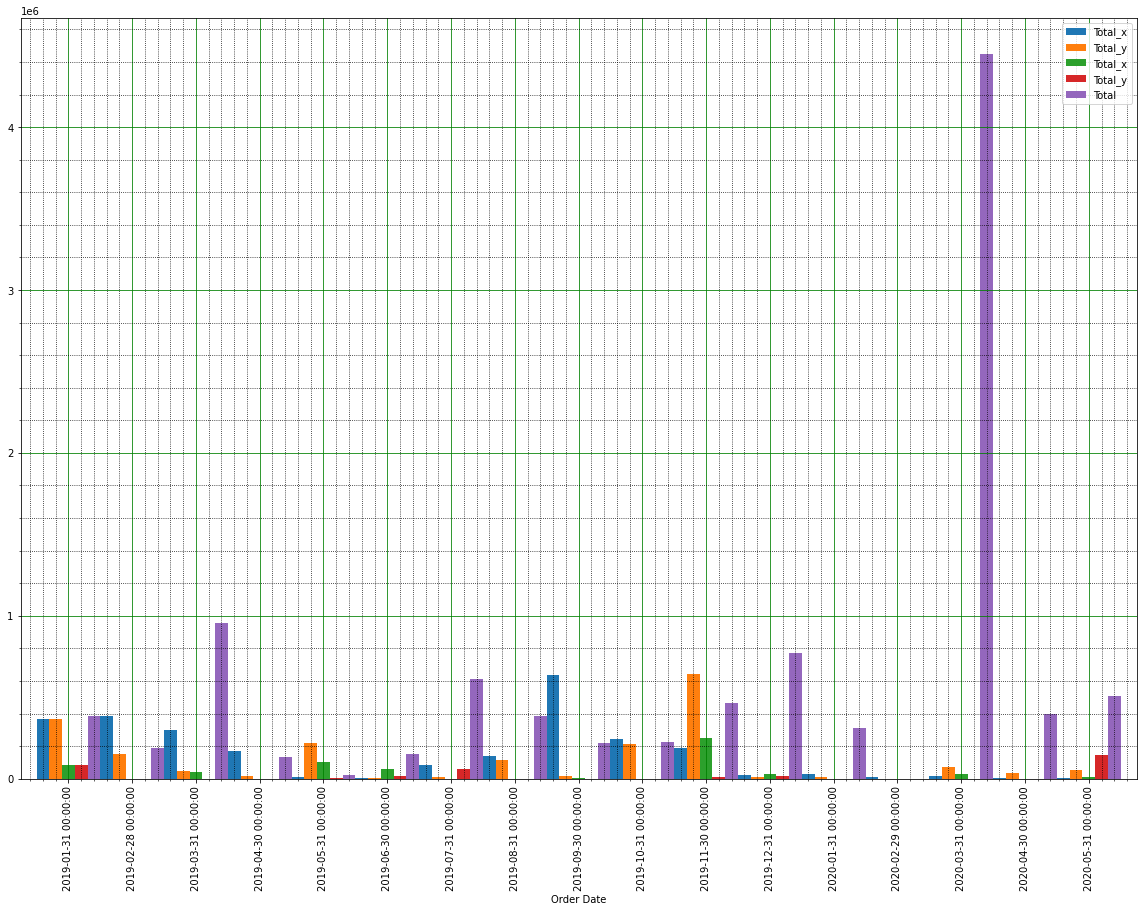

In [97]:
df_ewr
#x =ewr y=sjc, total= ams total2 = nrt purple = dfw2
result = pd.merge(df_ewr, df_sjc, on='Order Date')
r2 = pd.merge(result, df_ams, on='Order Date')
r3 = pd.merge(r2, df_nrt, on='Order Date')
r4 = pd.merge(r3, df_dfw, on='Order Date')


#r3.plot(kind='bar', width=1)
r4.plot.bar(width=1)
plt.rcParams['figure.figsize'] = (20,14)
#plt.figure(figsize=(10,5))
# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.8', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.8', color='black')

plt.show()

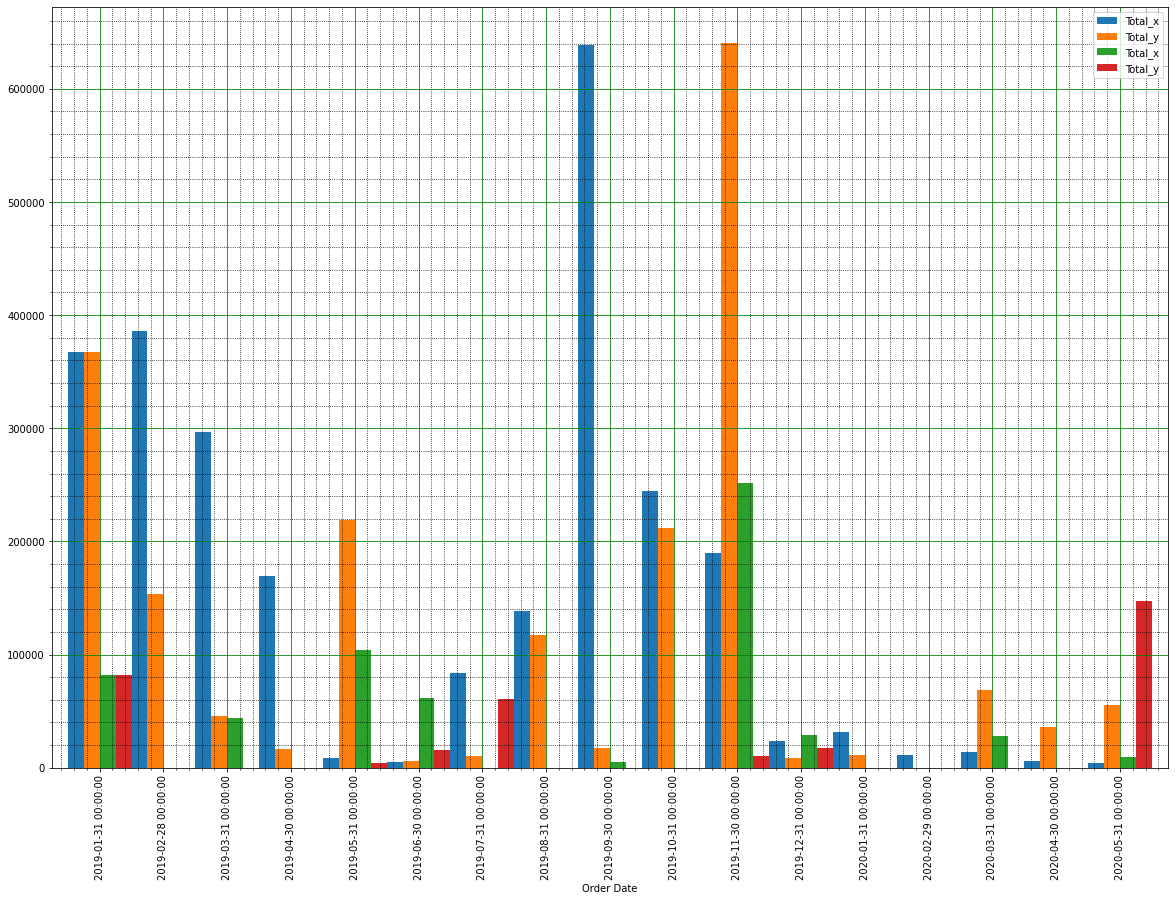

In [101]:
df_ewr
#x =ewr y=sjc, total= ams
result = pd.merge(df_ewr, df_sjc, on='Order Date')
r2 = pd.merge(result, df_ams, on='Order Date')
r3 = pd.merge(r2, df_nrt, on='Order Date')
r4 = pd.merge(r3, df_iad2, on='Order Date')

#merging IAD2 clips dataframe
#r3.plot(kind='bar', width=1)
r3.plot.bar(width=1)
plt.rcParams['figure.figsize'] = (20,14)
#plt.figure(figsize=(10,5))
# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.8', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.8', color='black')

plt.show()

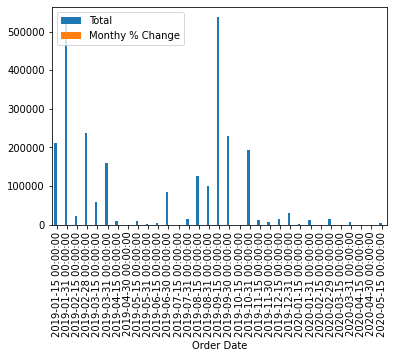

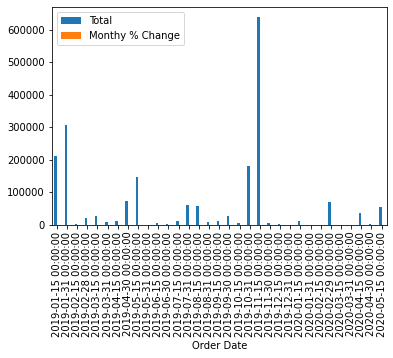

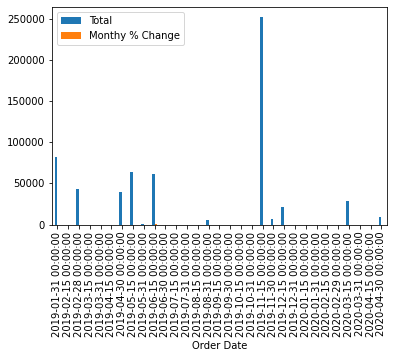

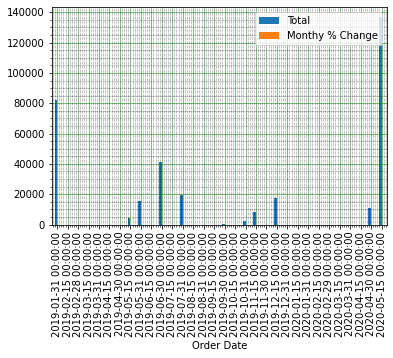

In [38]:
#Graphing
from matplotlib.pyplot import subplot

#plt.figure(1, figsize=(12,6))
#plt.bar(df_ams,df_sjc,df_ewr,df_nrt)
#plt.plot(df_ams)
#plt.plot(df_sjc)
#plt.plot(df_ewr)
#plt.plot(df_nrt)

X = 0.25
# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()